Total number of images (X): 1797
Total number of labels (Y): 1797
SVM training completed.
Model Accuracy: 0.8166666666666667


Saving img1.png to img1 (1).png


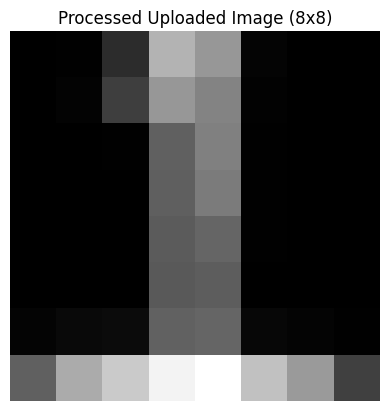

Predicted Digit: 1


In [2]:
# Classical ML based Object recognition (Handwritten Digit Recognition)

import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from skimage.feature import hog
from skimage.transform import resize

# -------------------------------
# Load Dataset
# -------------------------------
digits = datasets.load_digits()
X = digits.images
y = digits.target

print("Total number of images (X):", X.shape[0])
print("Total number of labels (Y):", y.shape[0])

# -------------------------------
# HOG Feature Extraction
# -------------------------------
features = []

for img in X:
    hog_feature = hog(
        img,
        pixels_per_cell=(4, 4),
        cells_per_block=(1, 1),
        orientations=9
    )
    features.append(hog_feature)

features = np.array(features)

# -------------------------------
# Train Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    features, y, test_size=0.2, random_state=42
)

# -------------------------------
# Train SVM Model
# -------------------------------
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print("SVM training completed.")

# -------------------------------
# Test Accuracy
# -------------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# -------------------------------
# Upload Image in Colab
# -------------------------------
from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    img = cv2.imread(file_name)

# -------------------------------
# Image Preprocessing (FINAL FIX)
# -------------------------------

# Convert to grayscale
if len(img.shape) == 3:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    img_gray = img

# Apply Otsu threshold (invert -> white digit on black)
_, img_thresh = cv2.threshold(img_gray, 0, 255,
                               cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Crop digit area
coords = cv2.findNonZero(img_thresh)
x, y, w, h = cv2.boundingRect(coords)
img_cropped = img_thresh[y:y+h, x:x+w]

# Resize to 8x8
img_resized = resize(img_cropped, (8, 8), anti_aliasing=True)

# Normalize to 0–16 pixel range
img_resized = (img_resized / img_resized.max()) * 16

# -------------------------------
# Display Processed Image
# -------------------------------
plt.imshow(img_resized, cmap="gray")
plt.title("Processed Uploaded Image (8x8)")
plt.axis('off')
plt.show()

# -------------------------------
# Extract HOG Features
# -------------------------------
test_feature = hog(
    img_resized,
    pixels_per_cell=(4, 4),
    cells_per_block=(1, 1),
    orientations=9
)

# -------------------------------
# Prediction
# -------------------------------
prediction = model.predict([test_feature])
print("Predicted Digit:", prediction[0])